In [37]:
import numpy as np

In [1]:
import matplotlib.pyplot as plt
import os

In [2]:
import brick_code as bc
from datetime import datetime
import pickle
import socket
import time

In [3]:
def run(name):
    attempt_name = f"{name}.pkl"
    s = socket.socket(socket.AF_INET, socket.SOCK_STREAM)
    # now connect to the web server on port 80 - the normal http port
    s.connect(("pyctf.class.net", 8086))
    lines = []
    chunk = s.recv(2048)
    while True:
        lines.append(chunk)
        chunk = chunk.decode()
        if chunk.find("GAME OVER") != -1:
            break
            
        block, offset = bc.get_current_block(chunk)
        board = bc.get_current_board(chunk)
        candidates = bc.get_candidates(board, block, offset)
        can = bc.get_best_candidate(candidates)
        
        s.send(f'{can["op"]}\n'.encode())
        time.sleep(0.1)
        chunk = s.recv(2048)
    with open(attempt_name, 'wb') as file_out:
        pickle.dump(lines, file_out)
    return lines

In [4]:
lines_of_lines = []
for n in [str(_) for _ in range(0,10)]:
    lines = run(n)
    lines_of_lines.append(lines)

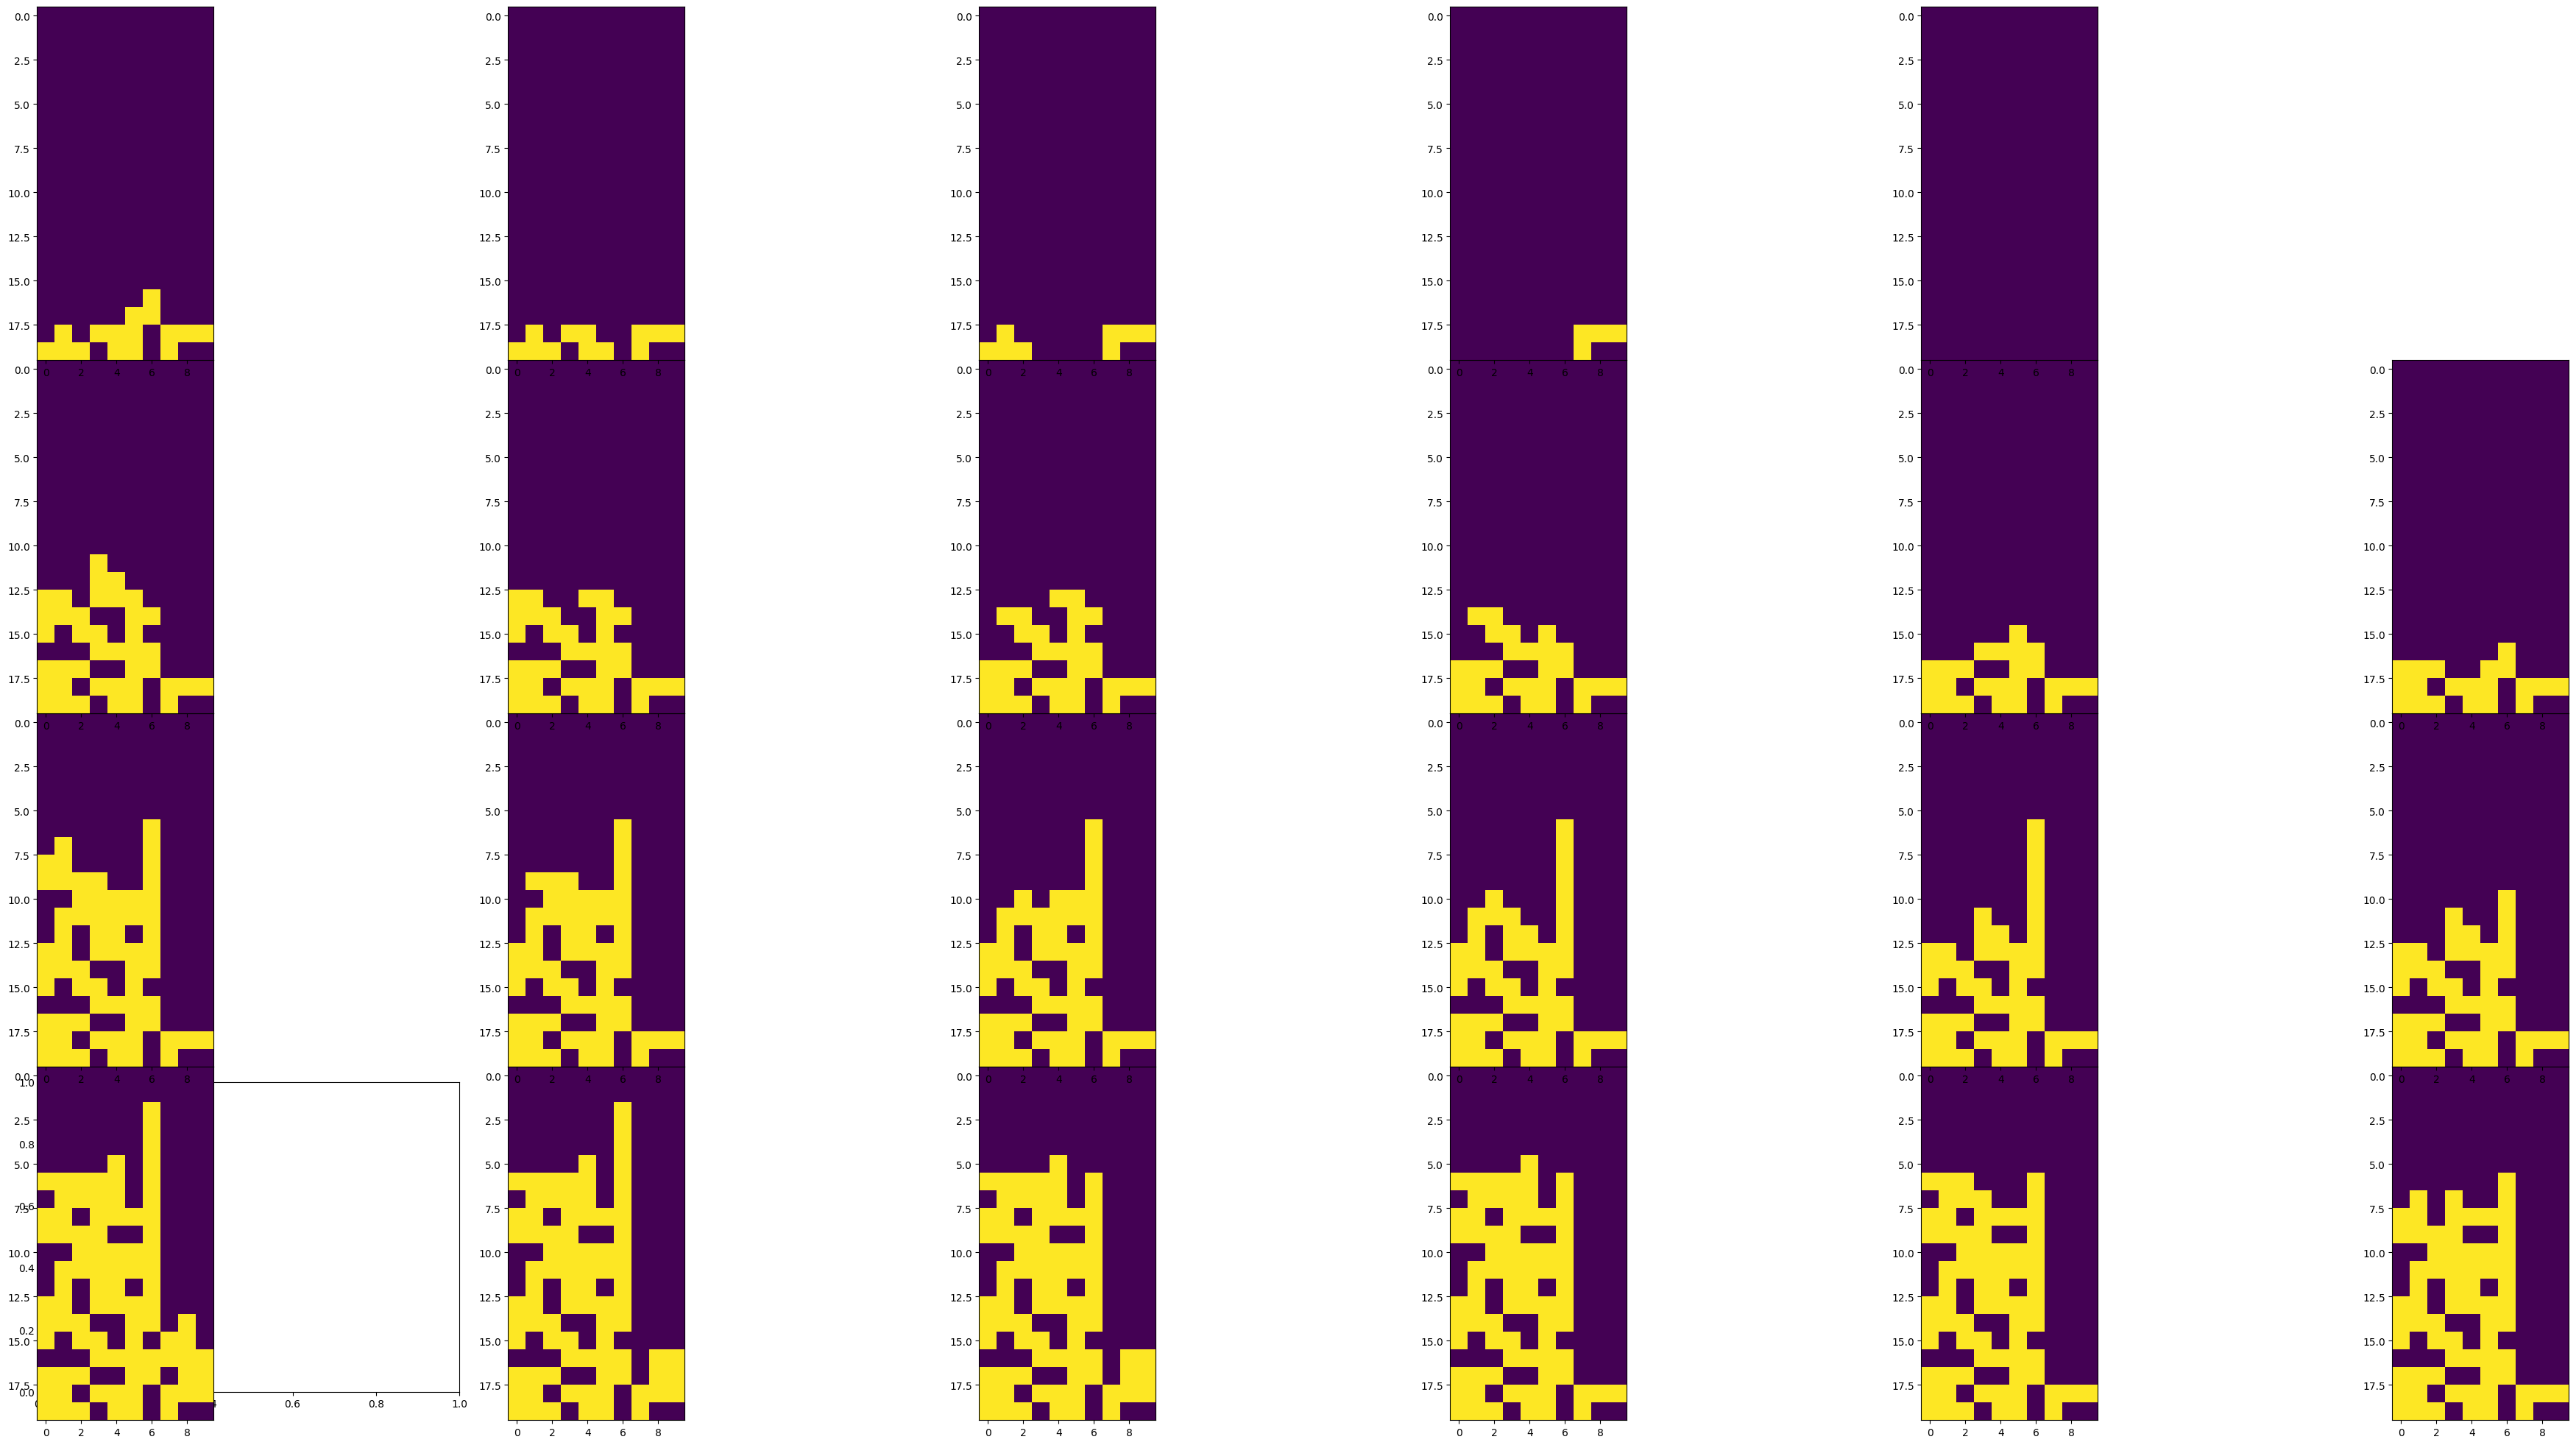

In [12]:
max_cols = 6
boards = []
for l in lines_of_lines[0]:
    l = l.decode()
    try:
        boards.append(bc.get_current_board(l))
    except:
        pass
fig, ax = plt.subplots()
fig.tight_layout()
row = 0
col = 0
for board in boards[::-1]:
    ax = fig.add_axes([col, row,.5,1])
    ax.imshow(board)
    
    if col  == max_cols-1:
        row += 1
        col = -1
    col += 1
plt.show()